# (Visualizing FordGoBike Data (January 2018 - December 2018) )
## by (Satyaraj Reddy)

## Investigation Overview

> In this investigation, I want to look at the common customer behaviour & characteristics of the Bay Area FordGoBike system. The main focus of my investigation is when bikes were in high demand on the timely basis(month, weekday, hour) for the both types of members.

## Dataset Overview

> The data consists of approximately FordGoBike's 18,50,000 bike rides for public from Jan 2018 to Dec 2018. The features include the trip start/end time, start/end station, duration in seconds as well as additional information such as user type, gender, and birth date. Approximately, 114,000 data points were removed from the analysis due to inconsistencies, such as inaccurate birth date, and a few columns having NaN values.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
base_color = sns.color_palette()[0]

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('fordgobike_master_clean_file.csv')

<b>Now, let's look at the user type split for FordGoBike sharing system</b>

In [4]:
# Let's calculate the customer and subscriber split
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()


customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

## Individual trips by subscription type

> Ford GoBike System currently offers 3 subscribtion types: Single Ride, Access Pass (24h or 72h) and Monthly Membership. Userss with a monthly membership ("Subscriber") make up almost 88% of all users in 2018 that used the system. 12% were casual riders ("Customer") using the bike share system ocasionally.

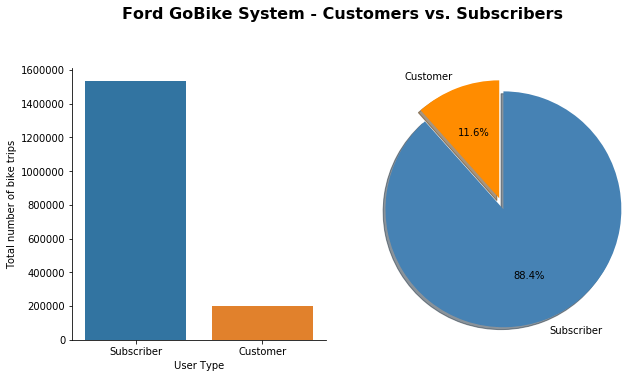

In [5]:
plt.figure(figsize = [10, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)
g = sns.countplot(data=df_clean,x='user_type',order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Total number of bike trips')


# code for the pie chart
plt.subplot(1, 2, 2)
labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike Usage by Month

> The summer months and early-mid autumn are the most popular times to use the Ford GoBikes. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the early winter months.

<Figure size 841.68x595.44 with 0 Axes>

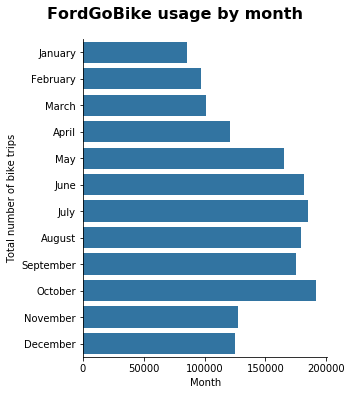

In [6]:
plt.figure(figsize=[ 11.69, 8.27]);
g = sns.catplot(data=df_clean,y='start_time_month',kind='count',color=base_color);
g.set_axis_labels('Month','Total number of bike trips');
g.fig.suptitle('FordGoBike usage by month',y=1.05,fontsize=16,fontweight='bold');

## (Ford GoBike System - Start Time vs. Weekday by User Type)

> Based on the below heatmap, we can clearly indicate different renting habits for customers and subscribers.<br><br>
> <b>Customers ride the FordGoBikes more often on weekends:</b>
- Weekdays(Mon-Fri): Most rides happen around 8-9am and 5-6pm with the peak on Fridays around 5pm.
- Weekends(Sat-Sun): Most rides happen between 11am - 6pm with the peak on Saturdays around 1pm - 2pm.

> <b>Subscribers use the bike sharing system mostly on weekdays:</b>
- Weekdays(Mon-Fri): Most rides happen around 8-9am and 5-6pm with the peak on Tuesdays around 8am.
- Weekends(Sat-Sun): The bikes are hardly rented during the weekends as most of them use the bikes for daily work commute.

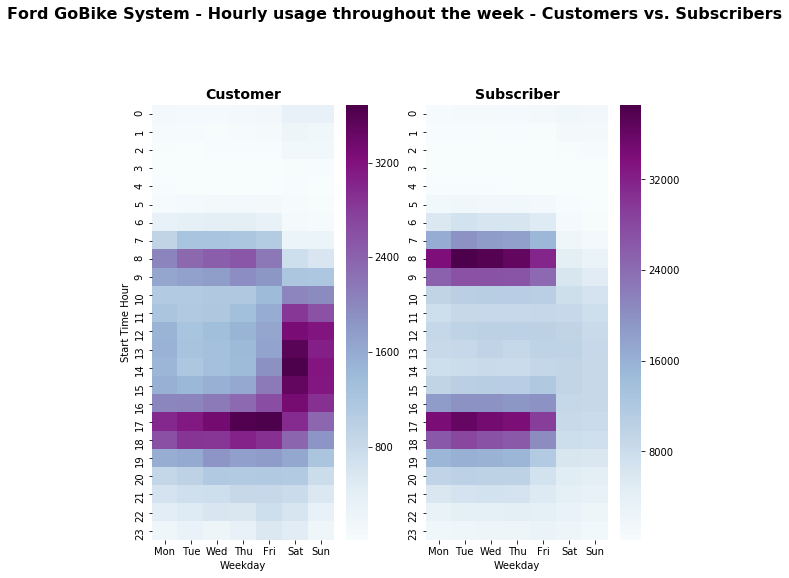

In [7]:
# Let's set the weekday order
df_clean['start_time_weekday'] =  pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Ford GoBike System - Hourly usage throughout the week - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


#Plotting a heatmap for Customers
plt.subplot(1,2,1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot('start_time_hour','start_time_weekday','bike_id')
sns.heatmap(df_customer,cmap='BuPu')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour');


#Plotting a heatmap for Subscribers
plt.subplot(1,2,2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot('start_time_hour','start_time_weekday','bike_id')
sns.heatmap(df_subscriber,cmap='BuPu')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('');

## Ford Go Bike System - Duration (Min) by User Type
> There is a difference in the trip duration between customers and subscribers.<br><br>
> <b>Customers</b> trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. <b>Subscribers </b>on the other hand are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

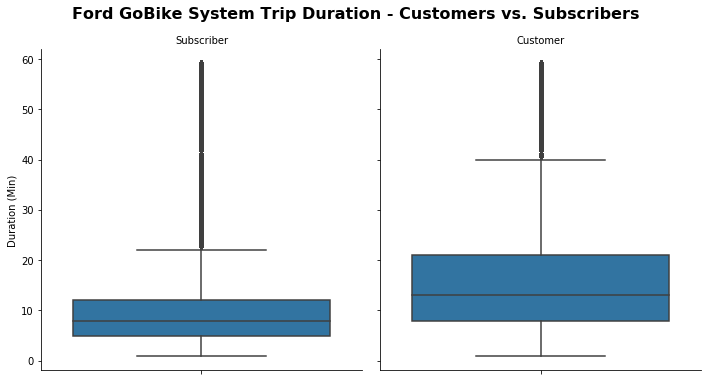

In [9]:
data = df_clean.query('duration_min < 60')
g = sns.catplot(data=data,y='duration_min',col='user_type',kind='box',color=base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford GoBike System Trip Duration - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

## Summary
> In the exploration, I found that there are two types of clients using the system: Subscribers who use it for their daily commute, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and Customers, usually tourists or occasional riders who use the system mainly on weekends to explore the Bay Area. The bike share system was used more often around summertime with a clear drop from January to March, most probably due to the harsh weather conditions.In most cases the trend for males/females was the same, except of the fact that females tend to have slightly longer trips and suprisingly, for casual users there are quite a lot of females using the system between January and March in comparison to males (the ratio is much smaller than for the rest of the year). 
This project is a win - win situation where a large number of people can benefit from this program:
- Environment friendly.
- Renting a bike from theFord GoBike System is a fantastic way of moving around in the city, both for enjoyment and work.
- Affordable and convenient transportation for the people of all socioeconomic classes.
- Customers (i.e. tourists, students on a vacation) have a sustainable, yet flexible option for touring the city.
- Subscribers (i.e. daily commuters) benefit from a health commuting choice.